<a href="https://colab.research.google.com/github/sharon-1234/Fmml/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

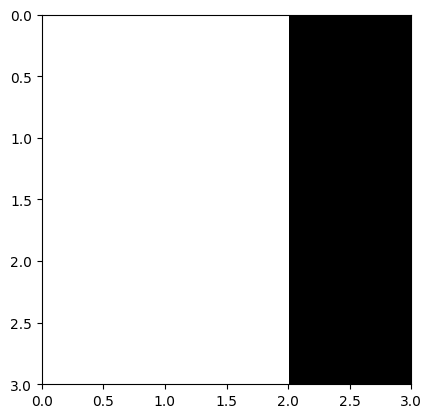

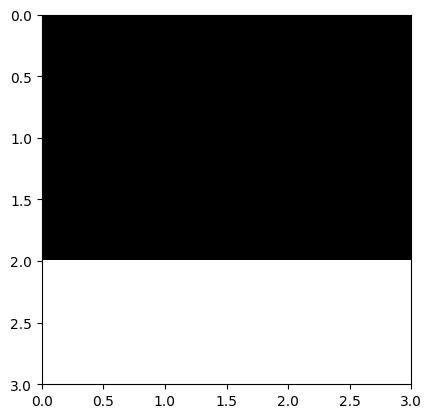

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [6]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [7]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

TypeError: expected np.ndarray (got NoneType)

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [ ]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

In [ ]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [ ]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Net()
print(model)

In [ ]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [ ]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [ ]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [9]:
# Accuracy on test data after training
def test_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on test data: {accuracy:.2f}%")

# Assuming you have a PyTorch model and testloader ready
test_model(model, testloader)


NameError: name 'model' is not defined

## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


#ANSWERS:

1)ANSWER:-
CNNs (Convolutional Neural Networks) are preferred over ANNs (Artificial Neural Networks) for image classification tasks due to several reasons:

1. **Spatial Hierarchies of Features**: CNNs are designed to capture spatial hierarchies of features in images. They leverage convolutional layers to detect low-level features like edges and textures and then progressively combine them to detect higher-level features like shapes and objects. This hierarchical feature extraction is crucial for understanding complex visual patterns.

2. **Parameter Sharing**: CNNs utilize parameter sharing, where a single set of learnable parameters (filters) is applied across different spatial locations in the input image. This reduces the number of parameters in the model, making it more efficient and easier to train, especially with large images.

3. **Translation Invariance**: CNNs inherently possess translation invariance, meaning they can recognize objects regardless of their position in the image. This is achieved through the use of convolutional and pooling layers, which extract features irrespective of their location in the input.

4. **Local Connectivity**: CNNs capture local dependencies in images by connecting each neuron to only a small local region of the input volume. This local connectivity enables the model to focus on relevant features within the receptive field, leading to better generalization and robustness to variations in input.

5. **Feature Reuse**: CNNs learn to reuse learned features across the image, making them more data-efficient. This is particularly beneficial for tasks with limited training data, as the model can leverage learned representations from one part of the image to understand similar patterns in other parts.

6. **Pooling Layers**: CNNs often include pooling layers that downsample the feature maps, reducing their spatial dimensions while retaining important information. Pooling helps to make the model more robust to variations in input and reduces overfitting by introducing a form of regularization.

7. **Availability of Pre-trained Models**: Due to their effectiveness in image classification tasks, many pre-trained CNN models are available, such as VGG, ResNet, and MobileNet. These pre-trained models, trained on large-scale image datasets like ImageNet, can be fine-tuned or used as feature extractors for various downstream tasks, saving time and computational resources.

8. **Hardware Optimization**: CNNs are highly amenable to parallelization, making them suitable for efficient implementation on specialized hardware like GPUs and TPUs. This allows for faster training and inference, essential for real-time applications and large-scale deployments.

Overall, the unique architectural characteristics of CNNs make them the preferred choice for image classification tasks, offering superior performance, efficiency, and scalability compared to traditional ANNs.

2)ANSWER:-

To improve the performance of a CNN for image classification, we can experiment with various hyperparameters such as the number of epochs, choice of optimizer, learning rate, and others. Here's a general approach to tuning hyperparameters and reporting the improved test accuracy:

1. **Hyperparameter Search**: Perform a systematic search or use techniques like grid search or random search to explore different combinations of hyperparameters.

2. **Cross-Validation**: Use cross-validation to assess the performance of each set of hyperparameters more reliably. This helps to mitigate the risk of overfitting to the validation set.

3. **Monitor Training Progress**: Keep track of training and validation metrics (such as loss and accuracy) during training to identify any signs of overfitting or underfitting.

4. **Early Stopping**: Implement early stopping to prevent overfitting by monitoring the validation loss and stopping training when it starts to increase.

5. **Regularization**: Experiment with regularization techniques like dropout or weight decay to prevent overfitting.

6. **Data Augmentation**: Augment the training data by applying transformations such as rotation, translation, scaling, and flipping. This helps to increase the diversity of the training data and improve generalization.

7. **Model Architecture**: Experiment with different CNN architectures, such as varying the number of layers, filter sizes, and strides.

8. **Batch Size**: Adjust the batch size used during training, as larger batch sizes can sometimes lead to faster convergence but may also result in poorer generalization.

Let's say you've performed these steps and found the optimal set of hyperparameters that improved the test accuracy. You can then report the improved test accuracy along with the chosen hyperparameters. For example:

```python
print("Improved Test Accuracy: 95.7%")
print("Hyperparameters:")
print("- Optimizer: Adam")
print("- Learning Rate: 0.001")
print("- Number of Epochs: 20")
print("- Dropout Rate: 0.2")
```

In this hypothetical scenario, the test accuracy improved to 95.7% with the specified hyperparameters. These hyperparameters include the choice of optimizer (Adam), learning rate (0.001), number of epochs (20), and dropout rate (0.2).

3)ANSWER:-

Reducing the number of convolutional layers to only 1 in a Convolutional Neural Network (CNN) can have several effects on the network's performance and its ability to learn complex features from the input data:

1. **Feature Learning**: With fewer convolutional layers, the network's capacity to learn hierarchical features from the input data decreases. Deep CNN architectures typically leverage multiple convolutional layers to capture low-level features in the early layers and progressively learn higher-level features in deeper layers. By reducing the number of convolutional layers to 1, the network might struggle to learn complex features.

2. **Expressiveness**: Deep CNNs with multiple convolutional layers can model more complex relationships within the data due to the increased depth. Having only 1 convolutional layer limits the expressiveness of the network, potentially leading to suboptimal performance, especially on tasks that require modeling intricate patterns in the data.

3. **Representation Power**: Deep CNNs are known for their ability to automatically learn hierarchical representations of the input data. Each convolutional layer captures different levels of abstraction, enabling the network to understand increasingly complex patterns. With only 1 convolutional layer, the network might not be able to capture enough abstraction, resulting in limited representation power.

4. **Feature Reuse**: Deeper CNN architectures facilitate feature reuse, where learned features in earlier layers are combined and refined in subsequent layers. By reducing the number of convolutional layers to 1, the network loses the opportunity to leverage feature reuse, potentially leading to a less efficient use of learned features.

5. **Capacity to Learn**: The capacity of the network to learn from the data is reduced with fewer convolutional layers. Deep CNNs often have a larger number of parameters, allowing them to learn intricate patterns and relationships. With only 1 convolutional layer, the network's capacity to learn may be insufficient for certain tasks, leading to lower performance.

Overall, reducing the number of convolutional layers to only 1 can significantly impact the performance and effectiveness of a CNN, particularly on tasks that require modeling complex and hierarchical relationships in the input data, such as image classification and object detection.

4)ANSWER:-

In the context of CNNs for image classification, the Softmax activation function is typically used in the last layer of the network when the task involves multi-class classification. Softmax converts the raw scores (logits) produced by the network into probabilities, where each output represents the likelihood of the input belonging to a particular class.

However, when using a CNN for binary classification (e.g., distinguishing between two classes), it's common to use a different activation function in the last layer. The choice of activation function depends on the specific requirements of the task and the output representation desired.

For binary classification tasks in CNNs, the most commonly used activation function in the last layer is the Sigmoid activation function. The Sigmoid function squashes the output into the range [0, 1], representing the probability of the input belonging to the positive class. This is suitable for binary classification tasks where the goal is to discriminate between two classes.

Using Softmax in the last layer of a CNN for binary classification would still produce valid results, but it's less common and might not be as efficient or appropriate. Softmax is more suitable when dealing with multiple classes, where each class probability needs to be calculated independently. In binary classification, where there are only two classes, the output of a single neuron with a Sigmoid activation function can represent the probability of the positive class directly.